<a href="https://colab.research.google.com/github/flowergum/NN/blob/task2_1/NN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

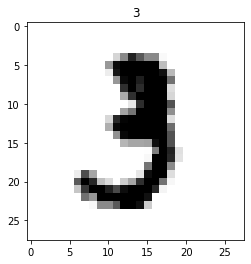

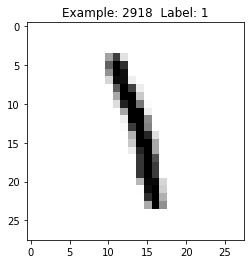

In [51]:


import numpy as np
import tensorflow as tf
mnist = tf.keras.datasets.mnist
import matplotlib.pyplot as plt
(x_train, y_train),(x_test, y_test) = mnist.load_data()


x_train, x_test = x_train, x_test
x_train.shape
plt.title(y_train[10])
plt.imshow(x_train[10], cmap=plt.get_cmap('gray_r'))
plt.show()


def display_digit(num):
    label = y_train[num]
    image = x_train[num]
    plt.title('Example: {}  Label: {}'.format(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()


display_digit(2918)
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(100, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])




In [52]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4432 - accuracy: 0.7318
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6503 - accuracy: 0.8225
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5348 - accuracy: 0.8555
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4603 - accuracy: 0.8738
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4291 - accuracy: 0.8866


In [53]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss = {}, accuracy = {}".format(loss, acc))
loss, acc = model.evaluate(x_train, y_train)
print("Loss = {}, accuracy = {}".format(loss, acc))
predictions = model.predict(x_test[0:1,:,:])
print(predictions)
print(y_test[0])

model.evaluate(x_test, y_test)
#model.summary()

313/313 [==============================] - 0s 1ms/step - loss: 0.2743 - accuracy: 0.9337
Loss = 0.2742536962032318, accuracy = 0.9337000250816345
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2259 - accuracy: 0.9395
Loss = 0.22589656710624695, accuracy = 0.9394500255584717
[[0.0000000e+00 7.1331712e-23 7.4341242e-30 3.2917163e-17 0.0000000e+00
  8.6289368e-37 0.0000000e+00 1.0000000e+00 2.7772846e-36 1.6381789e-27]]
7
313/313 [==============================] - 0s 1ms/step - loss: 0.2743 - accuracy: 0.9337


[0.2742536962032318, 0.9337000250816345]